# FP1–V6. Slobodno i prigušeno titranje
## Matija Pajas

In [1]:
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#from sympy import *
#init_printing()

from IPython.display import HTML
from IPython.display import display

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Pokaži/sakrij kod"></form>''')

In [3]:
display(HTML("""
<style>
.output {
    display: block;
    align-items: center;
    text-align: center;
}
td {
  text-align: center;
  vertical-align: middle;
}
</style>
"""))

## Cilj vježbe

Cilj ove vježbe je provjeriti svojstva njihala i odrediti neka njihova svojstva. Prva stvar koju želimo provjeriti je da li period titranja ovisi o izboru početne amplitude. Nakon toga uvesti ćemo prigušenje kako bismo provjerili kako se period ponaša tada. U svrhu reproducibilnosti eksperimenta za drugi zadatak ćemo koristiti istu amplitudu za sva prigušenja. Nakon što smo odredili periode i kružne frekvencije u cilju nam je odrediti logaritamski dekrement za nekoliko različitih prigušenja tako da ga svedemo na linearni oblik. Jednom kada je logaritamski dekrement određen ostaje nam odrediti faktor dobrote i provjeriti kako se on mijenja u odnosu na prigušenje.

## Mjerenje i pokus

Eksperiment se sastoji od kružnog njihala kojemu titra bakreni kotač koji je učvršćen na postolje te na jedan kraj spiralne opruge kojoj je drugi kraj nepomičan. Kako bismo ostvarili prigušenja izvor struje spajamo na elektromagnet koji inducira vrtložne struje u bakrenom kotaču, a jakost struje provjeravamo ampermetrom kako ne bismo prekoračili maksimalnu struju $I = 1 \ \mathrm{A}$ i oštetili uređaj.

## Zadatak 1 - Određivanje perioda titranja i karakteristične kružne frekvencije

U ovome zadatku bilo je potrebno izmjeriti periode za tri različite početne amplitude. Mjerenja smo izvodili tako da mjerimo vrijeme koje je njihalu potrebno da 10 puta zatitra, a zatim to vrijeme podijelimo sa 10. Za svaki period mjereno je tri puta deset potpunih perioda te se podaci istih mogu pronaći u tablici niže. Nakon što su izračunate srednje vrijednosti i nepouzdanosti perioda, povezali smo period i kružnu frekvenciju relacijom kako bismo i nju odredili.

In [4]:
T1 = [18.94,18.93,18.96]
T2 = [18.97,18.93,19.00]
T3 = [19.01,18.81,18.94]

T1 = [t/10 for t in T1]
T2 = [t/10 for t in T2]
T3 = [t/10 for t in T3]

d = {"$T_1$ / $\mathrm{s}$": T1,
     "$T_2$ / $\mathrm{s}$": T2,
     "$T_3$ / $\mathrm{s}$": T3}
df = pd.DataFrame(data=d, index=range(1,4))

means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])


T1.append(" ")
T2.append(" ")
T3.append(" ")

T1.append("19")
T2.append("16")
T3.append("10")

d = {"$T_1$ / $\mathrm{s}$": T1,
     "$T_2$ / $\mathrm{s}$": T2,
     "$T_3$ / $\mathrm{s}$": T3}
df = pd.DataFrame(data=d, index=[1,2,3," ","A"])
df = df.transpose()
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
#df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">1</th>
      <th style="min-width: 12;">2</th>
      <th style="min-width: 12;">3</th>
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$\phi$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">$T_1$ / $\mathrm{s}$</th>
      <td>1,894</td>
      <td>1,893</td>
      <td>1,896</td>
      <td></td>
      <td>19</td>
    </tr>
    <tr>
      <th style="min-width: 12;">$T_2$ / $\mathrm{s}$</th>
      <td>1,897</td>
      <td>1,893</td>
      <td>1,9</td>
      <td></td>
      <td>16</td>
    </tr>
    <tr>
      <th style="min-width: 12;">$T_3$ / $\mathrm{s}$</th>
      <td>1,901</td>
      <td>1,881</td>
      <td>1,894</td>
      <td></td>
      <td>10</td>
    </tr>
  </tbody>
</table>

$T_1 = (1,8943333333333332 \pm 0,0006831300510639955) \ \mathrm{s}$

$T_2 = (1,8966666666666665 \pm  0,001570562531918606) \ \mathrm{s}$

$T_3 = (1,8920000000000001 \pm  0,004538722287164194) \ \mathrm{s}$

Karakterističnu kružnu frekvenciju možemo pronaći relacijom:

$$\overline{\omega}=\frac{2\pi}{\overline{T}}$$

te pripadnu nepouzdanost možemo izračunati na ovaj način:

$$
\begin{align}
M_{\omega}& = \sqrt{\left ( \frac{\partial \omega }{\partial T}M_{T} \right )^{2}}=\sqrt{\left (- \frac{2\pi }{{T}^{2}}M_{T} \right )^{2}} = \sqrt{\frac{4\pi^{2}}{{T}^{2}} \frac{M^{2}_{T}}{{T}^{2}}} \\
M_{\omega}& ={\omega} \frac{M_{T}}{{T}}
\end{align}
$$
odnosno
$$M_{\omega}={\overline{\omega}} \frac{M_{T}}{\overline{T}}$$

$\omega_1 = (3,316831941147063 \pm 0,0011961081682173946) \ \mathrm{rad\cdot s^{-1}}$

$\omega_2 = (3,312751480059536 \pm 0,0027431722419012728) \ \mathrm{rad\cdot s^{-1}}$

$\omega_3 = (3,320922466796821 \pm 0,007966567026424431) \ \mathrm{rad\cdot s^{-1}}$

Nakon zaokruživanja konačni rezultati za periode titranja i karakteristične kružne frekvencije za amplitude $\phi_1 = 19, \ \phi_2 = 16, \ \phi_3 = 10$ su:

$T_1 = (1,8943 \pm 0,0007) \ \mathrm{s}, \ T_2 = (1,897 \pm  0,002) \ \mathrm{s}, \ T_3 = (1,892 \pm  0,005) \ \mathrm{s}$

$\omega_1 = (3,317 \pm 0,001) \ \mathrm{rad\cdot s^{-1}}, \ \omega_2 = (3,313 \pm 0,003) \ \mathrm{rad\cdot s^{-1}}, \ \omega_3 = (3,321 \pm 0,008) \ \mathrm{rad\cdot s^{-1}}$

## Zadatak 2 - Određivanje perioda i kružne frekvencije prigušenog titranja

Zadatak je ustvari samo nadogradnja na prethodni. Radi se ista stvar samo smo uveli prigušenje koje ostvarujemo strujom kroz zavojnice koje uzrokuju vrtložne struje u bakrenom kotaču koji titra. Zbog konzistentnosti sva mjerenja su učinjena sa istom početnom amplitudom $\phi = 16$.

In [5]:
T1 = [18.84,19.00,18.92,19.06,18.94]
T2 = [19.09,18.84,19.13,19.08,19.03]
T3 = [18.75,18.94,18.91,19.00,18.68]

T1 = [t/10 for t in T1]
T2 = [t/10 for t in T2]
T3 = [t/10 for t in T3]

d = {"$T_1$ / $\mathrm{s}$": T1,
     "$T_2$ / $\mathrm{s}$": T2,
     "$T_3$ / $\mathrm{s}$": T3}
df = pd.DataFrame(data=d, index=range(1,6))

means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])


T1.append(" ")
T2.append(" ")
T3.append(" ")

T1.append("0.16")
T2.append("0.34")
T3.append("0.52")

d = {"$T_1$ / $\mathrm{s}$": T1,
     "$T_2$ / $\mathrm{s}$": T2,
     "$T_3$ / $\mathrm{s}$": T3}
df = pd.DataFrame(data=d, index=[1,2,3,4,5," ","$I$ / $\mathrm{A}$"])
df = df.transpose()
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
#df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">1</th>
      <th style="min-width: 12;">2</th>
      <th style="min-width: 12;">3</th>
      <th style="min-width: 12;">4</th>
      <th style="min-width: 12;">5</th>
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$I$ / $\mathrm{A}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">$T_1$ / $\mathrm{s}$</th>
      <td>1,884</td>
      <td>1,9</td>
      <td>1,892</td>
      <td>1,906</td>
      <td>1,894</td>
      <td></td>
      <td>0,16</td>
    </tr>
    <tr>
      <th style="min-width: 12;">$T_2$ / $\mathrm{s}$</th>
      <td>1,909</td>
      <td>1,884</td>
      <td>1,913</td>
      <td>1,908</td>
      <td>1,903</td>
      <td></td>
      <td>0,34</td>
    </tr>
    <tr>
      <th style="min-width: 12;">$T_3$ / $\mathrm{s}$</th>
      <td>1,875</td>
      <td>1,894</td>
      <td>1,891</td>
      <td>1,9</td>
      <td>1,868</td>
      <td></td>
      <td>0,52</td>
    </tr>
  </tbody>
</table>

$T_1 = (1,8951999999999998 \pm 0,0037202150475476444) \ \mathrm{s}$

$T_2 = (1,9034 \pm 0,005104899607240087) \ \mathrm{s}$

$T_3 = (1,8856000000000002 \pm 0,006038211655780227) \ \mathrm{s}$

$\omega_1 = (3,3153151684147253 \pm 0,006507854251213284) \ \mathrm{rad\cdot s^{-1}}$

$\omega_2 = (3,3010325245243175 \pm 0,008853335945114501) \ \mathrm{rad\cdot s^{-1}}$

$\omega_3 = (3,3321941595139934 \pm 0,010670605437685719) \ \mathrm{rad\cdot s^{-1}}$

Te su konačni rezultati za period i kružnu frekvenciju prigušenog titranja nakon zaokruživanja:

$T_1 = (1,895 \pm 0,004) \ \mathrm{s}, \ T_2 = (1,903 \pm 0,005) \ \mathrm{s}, \ T_3 = (1,886 \pm 0,006) \ \mathrm{s}$

$\omega_1 = (3,315 \pm 0,007) \ \mathrm{rad\cdot s^{-1}}, \ \omega_2 = (3,301 \pm 0,009) \ \mathrm{rad\cdot s^{-1}}, \ \omega_3 = (3,33 \pm 0,01) \ \mathrm{rad\cdot s^{-1}}$

## Zadatak 3 - Određivanje logaritamskog dekrementa

Za ovaj zadatak bilo je potrebno za 3 struje gušenja očitati barem 10 uzastopnih amplituda oscilacija te ih povezati preko izraza za logaritamski dekrement. Njega će biti najlakše odrediti ako relaciju za logaritamski dekrement uspijemo svesti na linearan oblik te linearnom regresijom odredimo pravac koji najbolje opisuje očitane amplitude.

Kada se relacija logaritamskog dekrementa malo sredi ona izgleda ovako:

$$
\begin{align}
\Lambda = \ln\frac{\phi_{n}}{\phi_{n+1}} & =\ln\phi_{n}-\ln\phi_{n+1} \\
\ln\phi_{n} & = \ln{\phi_{0}}-n\Lambda \\
\ln\frac{\phi_{0}}{\phi_{n}} & = n\Lambda
\end{align}
$$

Ako je jednadžba pravca
$$y = ax + b$$
Iz naše relacije možemo prepoznati veličine na sljedeći način:
$$x = n $$
$$y = \ln\frac{\phi_{0}}{\phi_{n}}$$
$$a = \Lambda$$
$$b = 0$$

In [6]:
amplituda = [16,15.2,14.4,13.8,13,12.2,11.6,11,10.4,9.8,9.4]
amplituda2=[19,15.4,12.2,10.6,8.2,6,5.8,4.8,3.6,2.4,1]
amplituda3=[19,14.4,10,8.6,6.2,5.4,4.2,3.8,2.2,1.4,0.5]

d = {"$A_1$": amplituda,
     "$A_2$": amplituda2,
     "$A_3$": amplituda3}

df = pd.DataFrame(data=d, index=range(1,12))
df = df.transpose()
dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
#df

Podaci mjerenja nalaze se u tablici niže te se sprovodi linearna regresija nad njima.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">1</th>
      <th style="min-width: 12;">2</th>
      <th style="min-width: 12;">3</th>
      <th style="min-width: 12;">4</th>
      <th style="min-width: 12;">5</th>
      <th style="min-width: 12;">6</th>
      <th style="min-width: 12;">7</th>
      <th style="min-width: 12;">8</th>
      <th style="min-width: 12;">9</th>
      <th style="min-width: 12;">10</th>
      <th style="min-width: 12;">11</th>
      <th style="min-width: 12;">$I$ / $\mathrm{A}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">$A_1$</th>
      <td>16</td>
      <td>15,2</td>
      <td>14,4</td>
      <td>13,8</td>
      <td>13,0</td>
      <td>12,2</td>
      <td>11,6</td>
      <td>11,0</td>
      <td>10,4</td>
      <td>9,8</td>
      <td>9,4</td>
      <td>0,16</td>  
    </tr>
    <tr>
      <th style="min-width: 12;">$A_2$</th>
      <td>19</td>
      <td>15,4</td>
      <td>12,2</td>
      <td>10,6</td>
      <td>8,2</td>
      <td>6,0</td>
      <td>5,8</td>
      <td>4,8</td>
      <td>3,6</td>
      <td>2,4</td>
      <td>1,0</td>
      <td>0,4</td>  
    </tr>
    <tr>
      <th style="min-width: 12;">$A_3$</th>
      <td>19</td>
      <td>14,4</td>
      <td>10,0</td>
      <td>8,6</td>
      <td>6,2</td>
      <td>5,4</td>
      <td>4,2</td>
      <td>3,8</td>
      <td>2,2</td>
      <td>1,4</td>
      <td>0,5</td>
      <td>0,5</td>
    </tr>
  </tbody>
</table>

a = 0.054170958478887976 ± 0.0005072045257973055
b = -0.0584338022889932 ± 0.0034400285116008423

a = 0.25227317005339234 ± 0.02246257671100924
b = -0.380096994187046 ± 0.15234860540173142

a = 0.30978477196376897 ± 0.02835325128047642
b = -0.4396179013620174 ± 0.19230111022825705


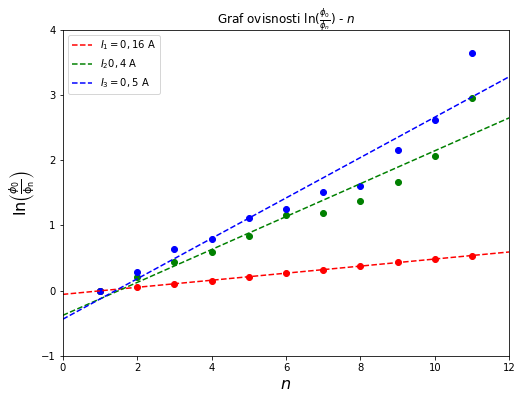

In [7]:
amplituda = [16,15.2,14.4,13.8,13,12.2,11.6,11,10.4,9.8,9.4]
amplituda2=[19,15.4,12.2,10.6,8.2,6,5.8,4.8,3.6,2.4,1]
amplituda3=[19,14.4,10,8.6,6.2,5.4,4.2,3.8,2.2,1.4,0.5]

lnamp = [np.log(16/a) for a in amplituda]
lnamp2 = [np.log(19/a) for a in amplituda2]
lnamp3 = [np.log(19/a) for a in amplituda3]

n = list(range(1,len(amplituda)+1))

pars,cov=curve_fit(lambda x,a,b: a*x+b, n, lnamp)
pars2,cov2=curve_fit(lambda x,a,b: a*x+b, n, lnamp2)
pars3,cov3=curve_fit(lambda x,a,b: a*x+b, n, lnamp3)

a=pars[0]
b=pars[1]

a2=pars2[0]
b2=pars2[1]

a3=pars3[0]
b3=pars3[1]

x_fit=linspace(0,16)
y_fit=a*x_fit+b

x_fit2=linspace(0,16)
y_fit2=a2*x_fit2+b2

x_fit3=linspace(0,16)
y_fit3=a3*x_fit3+b3


print("a =",pars[0],"±", sqrt(cov[0,0]))
print("b =",pars[1],"±", sqrt(cov[1,1]))
print()

print("a =",pars2[0],"±", sqrt(cov2[0,0]))
print("b =",pars2[1],"±", sqrt(cov2[1,1]))
print()

print("a =",pars3[0],"±", sqrt(cov3[0,0]))
print("b =",pars3[1],"±", sqrt(cov3[1,1]))

plt.figure(figsize=(8,6))
plt.scatter(n,lnamp,color="red")
plt.scatter(n,lnamp2,color="green")
plt.scatter(n,lnamp3,color="blue")
plt.plot(x_fit,y_fit,color="red",linestyle="--", label="$I_1 = 0,16 \ \mathrm{A}$")
plt.plot(x_fit2,y_fit2,color="green",linestyle="--", label="$I_2 0,4 \ \mathrm{A}$")
plt.plot(x_fit3,y_fit3,color="blue",linestyle="--", label="$I_3 = 0,5 \ \mathrm{A}$")
plt.xlim(0,12)
plt.ylim(-1,4)
plt.legend()

plt.title(r"Graf ovisnosti $\ln(\frac{\phi_0}{\phi_n})$ - $n$")
plt.xlabel(r"$n$",fontsize=16)
plt.ylabel(r"$\ln\left(\frac{\phi_0}{\mathrm{\phi_n}}\right)$",fontsize=16);

$a_1 = 0,054170958478887976 \pm 0,0005072045257973055$

$b_1 = -0,0584338022889932 \pm 0,0034400285116008423$

$a_2 = 0,2522731694462806 \pm 0,02246257651614887$

$b_2 = -0,5519472461095177 \pm 0,15234860489552252$

$a_3 = 0,30978477196376886 \pm 0,028353251877659753$

$b_3 = -0,6114681582890495 \pm 0,19230111249253148$

Konačni rezultati logaritamskog dekrementa za struje prigušenja $I_1 = 0.16 \ \mathrm{A}, \ I_2 = 0,4 \ \mathrm{A}, \ I_3 = 0,5 \ \mathrm{A}$ glase:

$\Lambda_1 = (0,0542 \pm 0,0005), \ \Lambda_2 = (0,25 \pm 0,02), \ \Lambda_3 = (0,31 \pm 0,03)$

Na grafu se jasno vidi kako za veće prigušenje mjerene točke više odstupaju od pravca. Razlog tomu je što je bilo teže očitavati vrijednosti amplituda za veća prigušenja. To se u obradi podataka manifestira kao odsječak na y-osi koji nije u slaganju sa predviđenim $b=0$ za pravce 2 i 3.

## Zadatak 4 - Određivanje faktora dobrote

Kako faktor dobrote možemo izraziti kao $Q=\frac{\omega_{\delta}}{2\delta}$, gdje je $\omega_{\delta}=\frac{2\pi}{T_{\delta}}$, te izraz za logaritamski dekrement možemo presložiti i napisati kao $\delta = \frac{\Lambda}{T_\delta}$ uvrštavajući ta dva izraza u početni $Q$ dobivamo:

$$ Q = \frac{2\pi}{T_\delta} \frac{T_\delta}{2\Lambda} = \frac{\pi}{\Lambda}$$

Ali kako računamo srednjim vrijednostima vrijedi

$$\overline{Q} = \frac{\pi}{\overline{\Lambda}}$$

i potrebno je izračunati pripadnu nepouzdanost

$$M_{Q}=\sqrt{\left ( \frac{\partial Q}{\partial \Lambda}M_{\Lambda} \right )^{2}}=\sqrt{\left (- \frac{\pi}{{\Lambda}^{2}}M_{\Lambda} \right )^{2}}=\sqrt{\frac{\pi^{2}}{{\Lambda}^{2}} \frac{M^{2}_{\Lambda}}{{\Lambda}^{2}}}={Q} \frac{M_{\Lambda}}{{\Lambda}}$$

odnosno

$$M_Q =\overline{Q}\frac{{M_{\Lambda}}}{{\overline{\Lambda}}}$$

Rezultati faktora dobrote za pripadne struje prigušenja $I_1 = 0.16 \ \mathrm{A}, \ I_2 = 0,4 \ \mathrm{A}, \ I_3 = 0,5 \ \mathrm{A}$ glase:

$Q_1 = (58 \pm 0,5), \ Q_2 = (12 \pm 1),\ Q_3 = (10,1 \pm 0,9)$

## Zaključak

U prvome zadatku podaci impliciraju kako period titranja i karakteristična kružna frekvencija ne ovise o odabiru početne amplitude jer smo dobili jako slične vrijednosti u decimalu sa jako malim nepouzdanostima. Istu stvar možemo primjetiti i u drugome zadatku iako smo za ovaj slučaj očekivali povečanje perioda, a smanjenje kružne frekvencije. Vrijednosti su i dalje slične jer već u neprigušenom slučaju postoji prigušenje u obliku trenja i otpora zraka, tako da nije velika razlika između ta 2 slučaja.

U trećem zadatku linearizacijom izraza za logaritamski dekrement uspjeli smo ga odrediti, no za veća gušenja imali smo veća pogreške očitavanja što se vidi u velikim odsječcima na y-osi. Iako sami rezultati nisu baš najprecizniji i dalje se može vidjeti kako logaritamski dekrement $\Lambda$ raste proporcionalno sa prigušenjem što je i predviđeno.

U četvrtom zadatku treba samo primjetiti kako faktor dobrote opada što je prigušenje veće. a to je također očekivano.